In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv(r"C:\Users\smand\OneDrive\Desktop\DATA SCIENCE\Datasets\ipl_2022_dataset.csv")

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [5]:
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [6]:
ipl= ipl.drop('Unnamed: 0', axis=1)
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [7]:
ipl.shape

(633, 7)

In [8]:
# To figure out the number of null columns in the dataset

ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [9]:
ipl[ipl['COST IN ₹ (CR.)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [10]:
ipl['COST IN ₹ (CR.)'] = ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)'] = ipl['Cost IN $ (000)'].fillna(0)

In [11]:
ipl['2021 Squad']= ipl['2021 Squad'].fillna('Not Participated')

In [12]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [13]:
teams= ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
ipl['Status'] = ipl['Team'].replace(teams,'Sold')
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [15]:
ipl[ipl['Player'].duplicated(keep =False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Participated,Unsold,Unsold


In [16]:
#Total No. of players in the auction

ipl.shape[0]

633

In [17]:
#Players per category in the auction
category = ipl['TYPE'].value_counts()
category.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


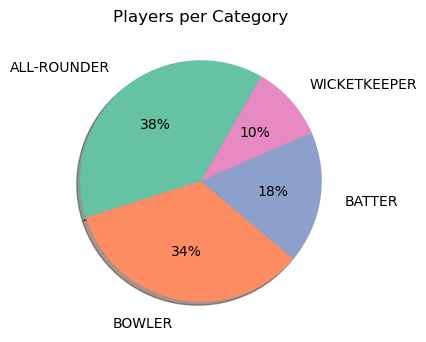

In [18]:
plt.figure(dpi=100)
colors = sns.color_palette('Set2')[0:4]
plt.pie(x=category.values,labels = category.index, shadow=True,startangle=60,labeldistance=1.2,autopct='%.0f%%',colors=colors)
plt.title('Players per Category');

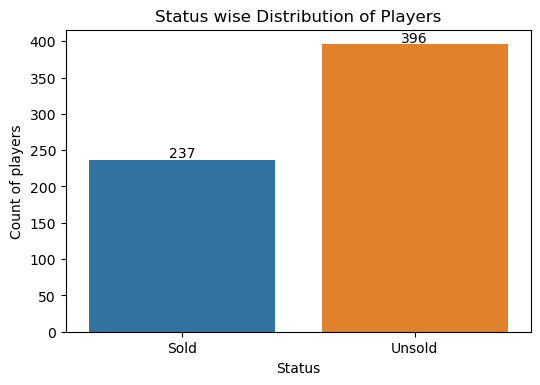

In [19]:
plt.figure(dpi=100)
ax = sns.countplot(data=ipl, x='Status')
plt.ylabel('Count of players')
plt.title('Status wise Distribution of Players')
        
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+0.8),xytext=(0,4),ha ='center', va='center', textcoords='offset points')


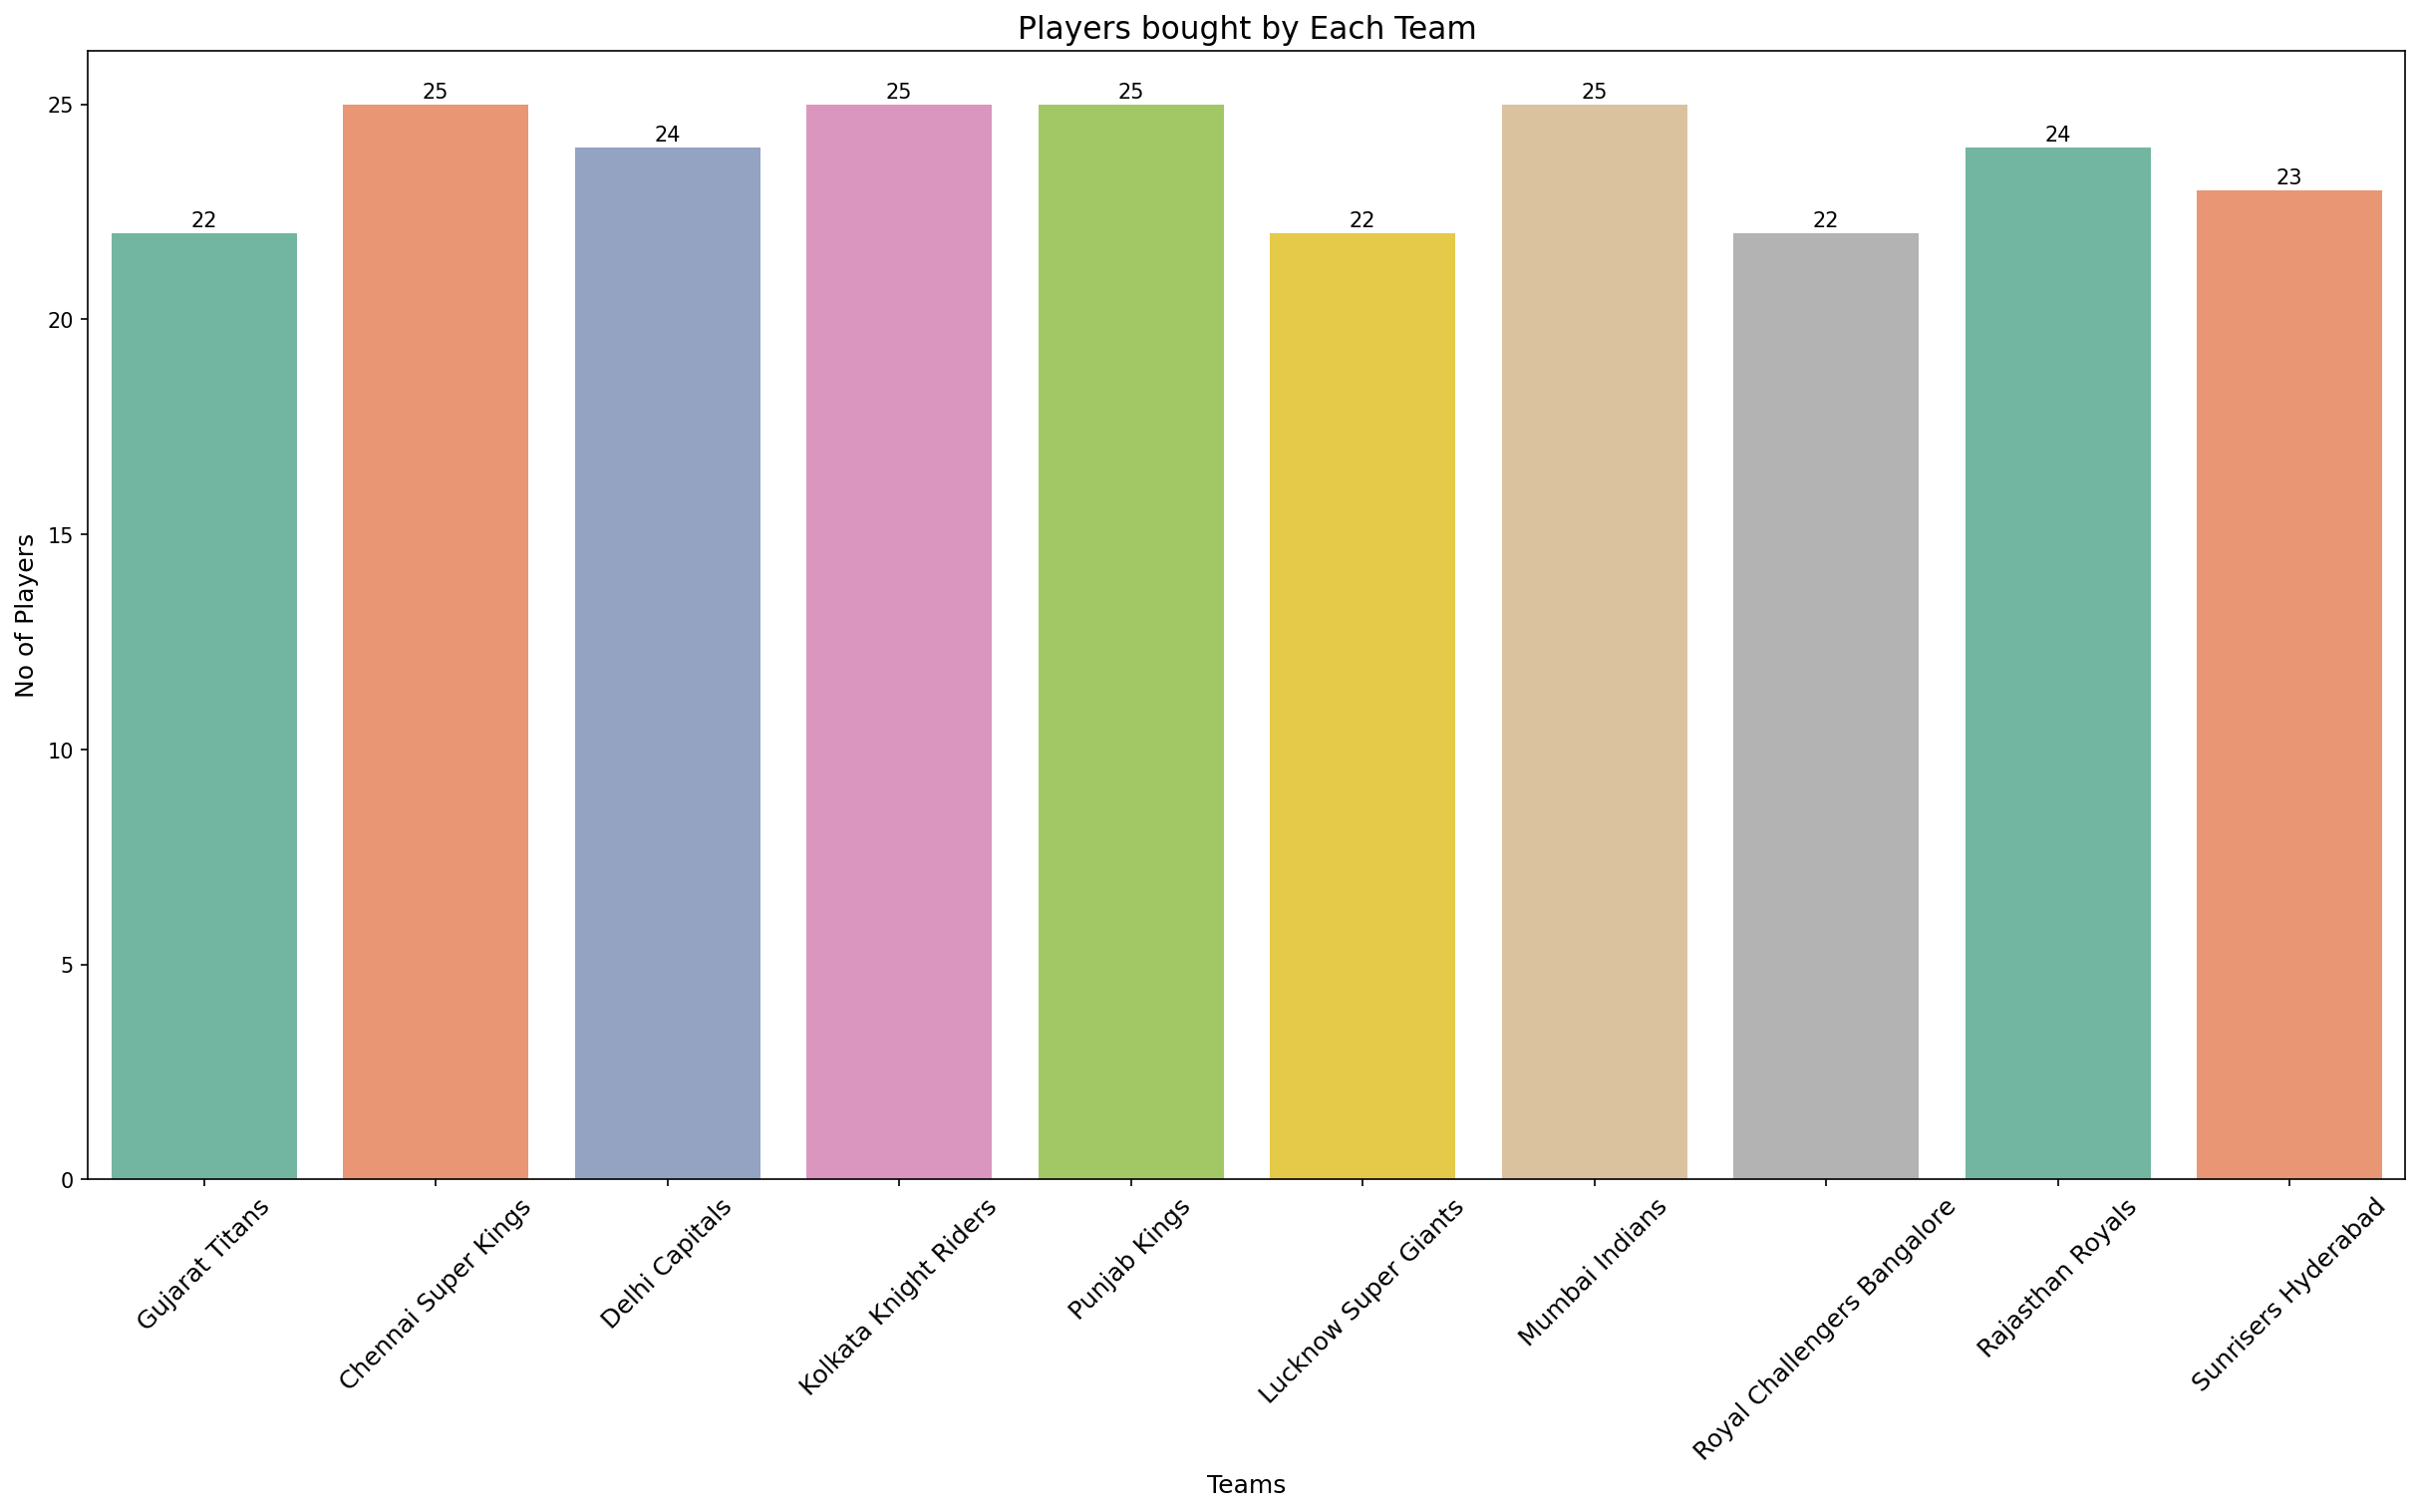

In [48]:
#Total players bought by each time
plt.figure(figsize=(20,10),dpi=150)
fig = sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'],palette='Set2')
plt.title('Players bought by Each Team', fontsize=15)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('No of Players', fontsize=12)
plt.xticks(rotation = 45, fontsize=12)

for p in fig.patches:
       fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+0.1),xytext=(0,4),ha ='center', va='center', textcoords='offset points')


In [56]:
ipl['Base Price'].value_counts()
prices = ['20 Lakh','30 Lakh','40 Lakh','50 Lakh','75 Lakh','1 Cr','1.5 Cr','2 Cr']

ipl['Retention']=ipl['Base Price']
ipl['Retention'] = ipl['Retention'].replace(['20 Lakh','30 Lakh','40 Lakh','50 Lakh','75 Lakh','1 Cr','1.5 Cr','2 Cr'],'From Auction')
ipl['Retention'].value_counts()

From Auction    600
Retained         27
Draft Pick        6
Name: Retention, dtype: int64

In [58]:
#Convert Draft Pick
ipl['Base Price']=ipl['Base Price'].replace('Draft Pick',0)

In [64]:
#Picking out base price
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x:str(x).split()[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x:str(x).split()[0])

0       0
1       0
2       2
3      40
4       0
       ..
628    20
629    20
630    20
631    20
632    20
Name: base_price, Length: 633, dtype: object

In [69]:
#Convert Retained to 0
ipl['base_price'] = ipl['base_price'].replace('Retained',0)

In [72]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [82]:
ipl.groupby(['Team','Retention'])['Retention'].count()[:-1]

Team                         Retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

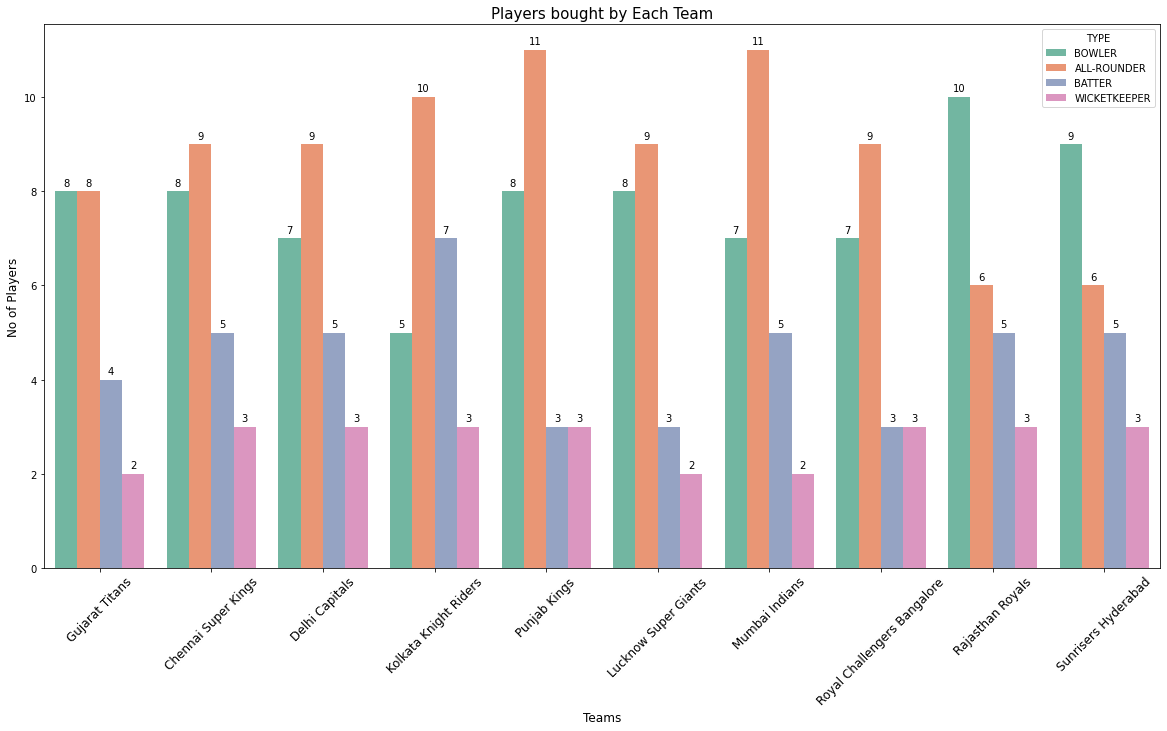

In [88]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'],palette='Set2',hue=ipl['TYPE'])
plt.title('Players bought by Each Team', fontsize=15)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('No of Players', fontsize=12)
plt.xticks(rotation = 45, fontsize=12)

for p in fig.patches:
       fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+0.1),xytext=(0,4),ha ='center', va='center', textcoords='offset points')


In [91]:
ipl.head()


,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [112]:
#Highest Amount Spent on a Single Player by Each Team:
ipl[ipl['Retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1]

Team
Chennai Super Kings            14.00
Delhi Capitals                 10.75
Gujarat Titans                 10.00
Kolkata Knight Riders          12.25
Lucknow Super Giants           10.00
Mumbai Indians                 15.25
Punjab Kings                   11.50
Rajasthan Royals               10.00
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Name: COST IN ₹ (CR.), dtype: float64

In [137]:
ipl[ipl['Retention']=='Retained'][['Player','Team','COST IN ₹ (CR.)']].groupby(['Team']).head()

,Player,Team,COST IN ₹ (CR.)
22,Ravindra Jadeja,Chennai Super Kings,16.0
24,MS Dhoni,Chennai Super Kings,12.0
25,Moeen Ali,Chennai Super Kings,8.0
27,Ruturaj Gaikwad,Chennai Super Kings,6.0
47,Rishabh Pant,Delhi Capitals,16.0
49,Axar Patel,Delhi Capitals,9.0
50,Prithvi Shaw,Delhi Capitals,7.5
52,Anrich Nortje,Delhi Capitals,6.5
72,Andre Russell,Kolkata Knight Riders,12.0
74,Venkatesh Iyer,Kolkata Knight Riders,8.0


In [151]:
#Top 10 bowlers in auction

ipl[(ipl['Retention']=='From Auction') & (ipl['TYPE'] =='BOWLER')].sort_values(by='COST IN ₹ (CR.)', ascending = False).head(10)[['Player','Base Price','Team','COST IN ₹ (CR.)']]

,Player,Base Price,Team,COST IN ₹ (CR.)
23,Deepak Chahar,2 Cr,Chennai Super Kings,14.00
48,Shardul Thakur,2 Cr,Delhi Capitals,10.75
192,Prasidh Krishna,1 Cr,Rajasthan Royals,10.00
2,Lockie Ferguson,2 Cr,Gujarat Titans,10.00
122,Avesh Khan,20 Lakh,Lucknow Super Giants,10.00
98,Kagiso Rabada,2 Cr,Punjab Kings,9.25
194,Trent Boult,2 Cr,Rajasthan Royals,8.00
172,Josh Hazlewood,2 Cr,Royal Challengers Bangalore,7.75
126,Mark Wood,2 Cr,Lucknow Super Giants,7.50
196,Yuzvendra Chahal,2 Cr,Rajasthan Royals,6.50


In [160]:
#Players who participated in Previous Season but went Unsold

ipl[(ipl['2021 Squad'] != 'Not Participated') & (ipl['Status']=='Unsold')][['Player','2021 Squad']]

,Player,2021 Squad
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB


In [157]:
ipl['2021 Squad'].value_counts()

Not Participated    434
MI                   26
SRH                  26
CSK                  25
RR                   25
DC                   25
KKR                  25
PBKS                 24
RCB                  23
Name: 2021 Squad, dtype: int64